from: http://webapp.inei.gob.pe:8080/sirtod-series/

# Imports / load data

In [1]:
import os
os.chdir('..')
%load_ext autoreload
%autoreload 2

In [345]:
import numpy as np, pandas as pd, seaborn as sns, unidecode, math, rfpimp, altair as alt
import matplotlib.pyplot as plt
from pathlib import Path
from perustats import inei_series, plots
alt.renderers.enable('notebook')
%matplotlib inline

In [3]:
df = pd.read_csv('data/processed/inei_series.csv', index_col='indicador', low_memory=False)
df.head(2)

,ambito,unidad,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
indicador,,,,,,,,,,,,,,,,,,,,,
precio_promedio_pagado_al_productor_de_fibra_de_alpaca,Amazonas,Soles/kg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio_promedio_pagado_al_productor_de_fibra_de_llama,Amazonas,Soles/kg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Interesting vars

- Nacimientos registrados
- Tasa bruta de natalidad total de encuesta
- Tasa de fecundidad total de 15 - 19 años
- Tasa global de fecundidad
- Tasa Total de mortalidad materna

- Denuncias de violencia familiar con maltrato psicológico
- Denuncias de violencia familiar por problemas conyugales y familiares
- Denuncias de violencia familiar por problemas Económicos y de trabajo
- Denuncias de violencia familiar por problemas de incompatibilidad de caracteres
- Casos registrados por el Ministerio de la Mujer y Poblaciones Vulnerables, de violencia familiar y/o sexual contra el hombre
- Casos registrados por el Ministerio de la Mujer y Poblaciones Vulnerables, de violencia familiar y/o sexual contra la mujer
- Víctimas de feminicidio por pareja o ex-pareja
- Víctimas de feminicidio por un familiar
- Víctimas de feminicidio por otra persona

- Total de establecimientos del Seguro Social de Salud
- Hospitales del Seguro Social de Salud (EsSALUD)
- Otros establecimientos del Seguro Social de Salud (EsSALUD)
- Evolución de casos notificados de malaria
- Casos notificados de tuberculosis

- Hogares que tienen al menos una computadora a nivel nacional

- Gasto Público por alumno en Educación Básica Alternativa
- Gasto Público por alumno en Educación Básica Especial
- Gasto Público por alumno en Educación Técnico Productiva

- Variables de productos:
    - Producción
    - Superficie sembrada
    - Superficie cosechada
    - Rendimiento
    - Precio en chacra
    
- Superficie cosechada de coco
- Rendimiento de coco
- Precio en chacra de coco

- Producción total de petróleo crudo
- Producción total de líquidos de gas natural
- Producción fiscalizada de gas natural
- Regalías cobradas por explotación de petróleo crudo
- Regalías cobradas por explotación de gas natural
- Retribuciones pagadas por explotación de petróleo crudo

**Tasa de fecundidad general:** Número de nacimientos con vida por cada 1.000 mujeres de edades comprendidas entre los 15 y los 49 años, en un año dado.

**La tasa de mortalidad materna**: (MMRatio) es el número anual de muertes femeninas por cada 100,000 nacidos vivos por cualquier causa relacionada con o agravada por el embarazo o su manejo (excluyendo causas accidentales o incidentales). El MMRatio incluye las muertes durante el embarazo, el parto o dentro de los 42 días de la interrupción del embarazo, independientemente de la duración y el lugar del embarazo, durante un año específico.

In [4]:
[e for e in df.index.unique() if 'violencia' in e]

['denuncias_de_violencia_familiar_con_maltrato_psicologico',
 'denuncias_de_violencia_familiar_por_problemas_conyugales_y_familiares',
 'denuncias_de_violencia_familiar_por_problemas_economicos_y_de_trabajo',
 'denuncias_de_violencia_familiar_por_problemas_de_incompatibilidad_de_caracteres',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_el_hombre',
 'casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_la_mujer']

# Fertility & maternal mortality

Tasa Global De Fecundidad (Tasa):


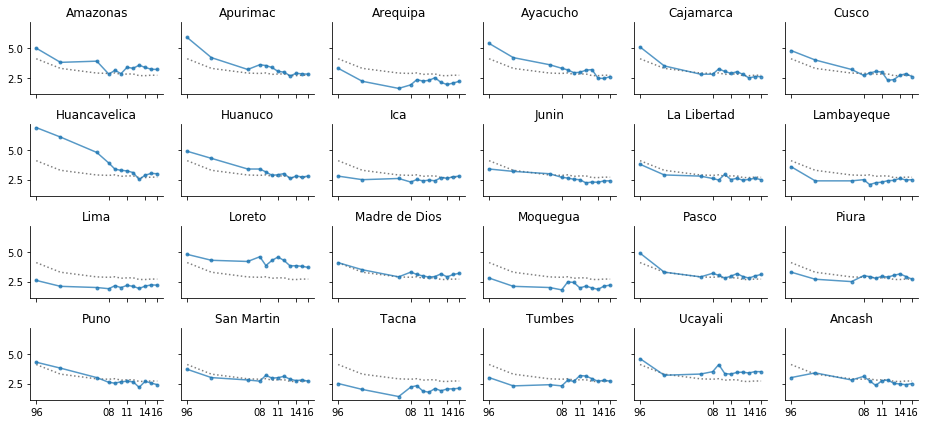

Years: 1996, 2000, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


Tasa Total De Mortalidad Materna (Por 100 000 nacidos vivos):


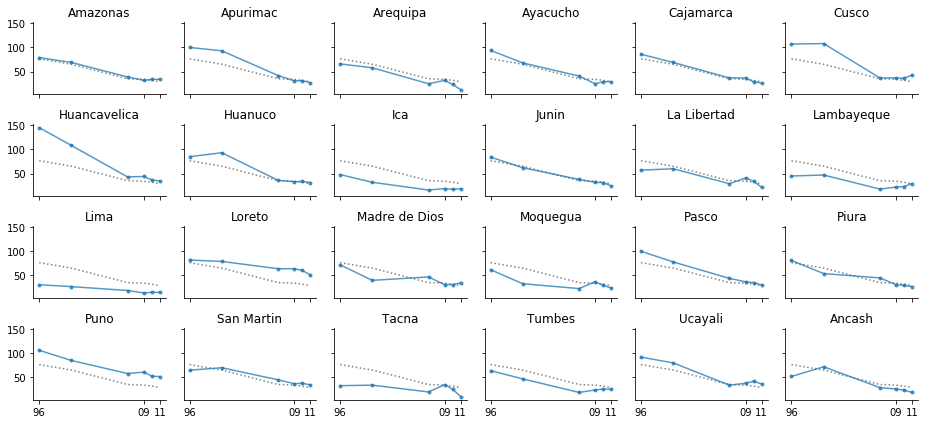

Years: 1996, 2000, 2007, 2009, 2010, 2011.


In [5]:
inei_series.plot_vars(df, ['tasa_global_de_fecundidad', 'tasa_total_de_mortalidad_materna'])

# Violence

In [6]:
violence_vars = ['denuncias_de_violencia_familiar_con_maltrato_psicologico',
                 'denuncias_de_violencia_familiar_por_problemas_conyugales_y_familiares',
                 'denuncias_de_violencia_familiar_por_problemas_economicos_y_de_trabajo',
                 'denuncias_de_violencia_familiar_por_problemas_de_incompatibilidad_de_caracteres']

## Series plots

Denuncias De Violencia Familiar Con Maltrato Psicologico (casos por cada 1000 personas):


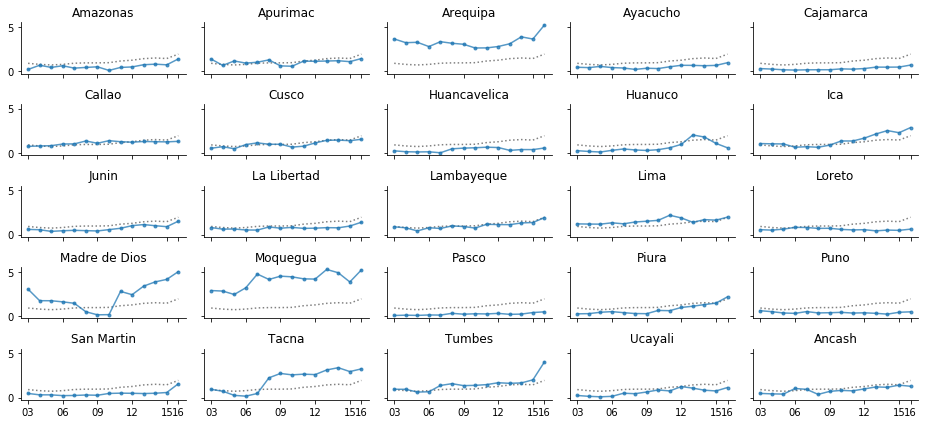

Years: 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


Denuncias De Violencia Familiar Por Problemas Conyugales Y Familiares (casos por cada 1000 personas):


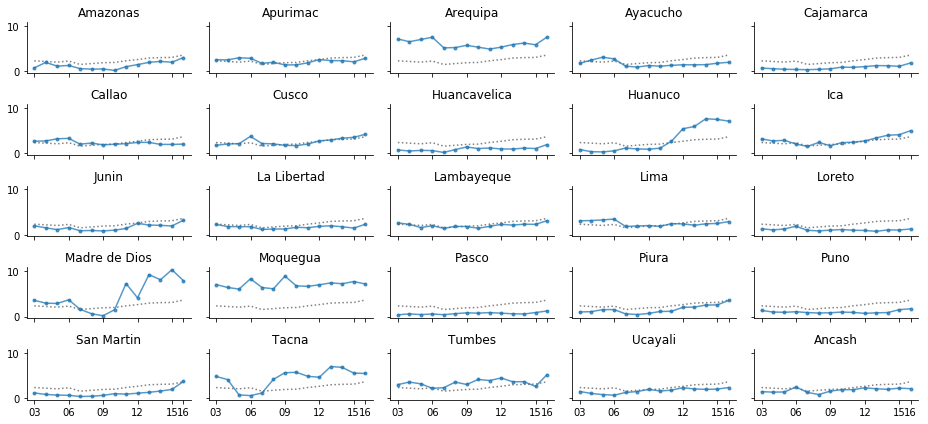

Years: 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


Denuncias De Violencia Familiar Por Problemas Economicos Y De Trabajo (casos por cada 1000 personas):


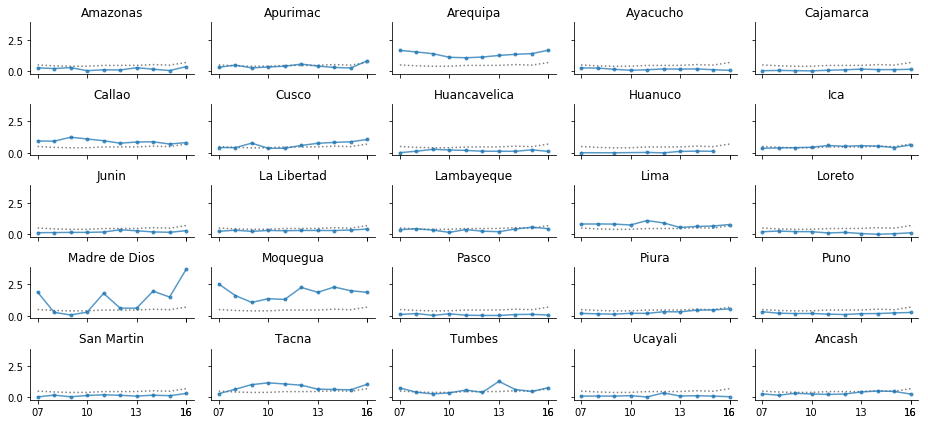

Years: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


Denuncias De Violencia Familiar Por Problemas De Incompatibilidad De Caracteres (casos por cada 1000 personas):


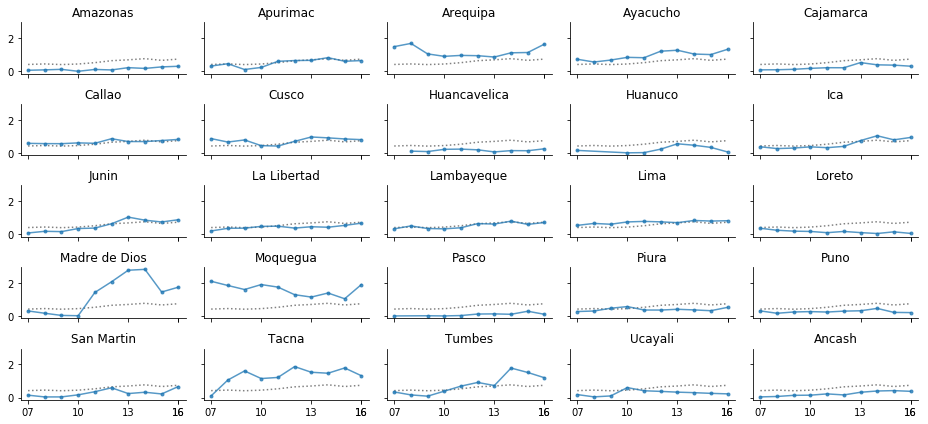

Years: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [7]:
inei_series.plot_vars(df, violence_vars,
                      ratio_by=inei_series.FLDS_POPULATION,
                      ratio_desc='casos por cada 1000 personas', ratio_mult=1000, cols=5)

## Slopegraphs

In [10]:
violence_vars
year = 2016

In [80]:
def format_names(df):
    d = {
    'denuncias_de_violencia_familiar_con_maltrato_psicologico': 'Maltrato psicologico',
    'denuncias_de_violencia_familiar_por_problemas_conyugales_y_familiares': 'Problemas conyugales',
    'denuncias_de_violencia_familiar_por_problemas_economicos_y_de_trabajo': 'Problemas economicos',
    'denuncias_de_violencia_familiar_por_problemas_de_incompatibilidad_de_caracteres': 'Incomp. de caracteres'
    }
    df.indicador = df.indicador.apply(lambda x: d[x])
    return df

In [426]:
year = 2016
unidad = 'casos por cada 10,000 habitantes'
df_v = inei_series.get_data_series(df, violence_vars, ratio_by=inei_series.FLDS_POPULATION,
                                   ratio_desc=unidad, ratio_mult=10_000)
df_v = format_names(df_v).drop(['unidad', 'quantity', 'total'], axis=1)
df_v.head()

,indicador,departamento,y,value
0,Maltrato psicologico,Amazonas,2003,2.202760
1,Maltrato psicologico,Amazonas,2004,6.912188
2,Maltrato psicologico,Amazonas,2005,4.492498
3,Maltrato psicologico,Amazonas,2006,6.345618
4,Maltrato psicologico,Amazonas,2007,3.669164


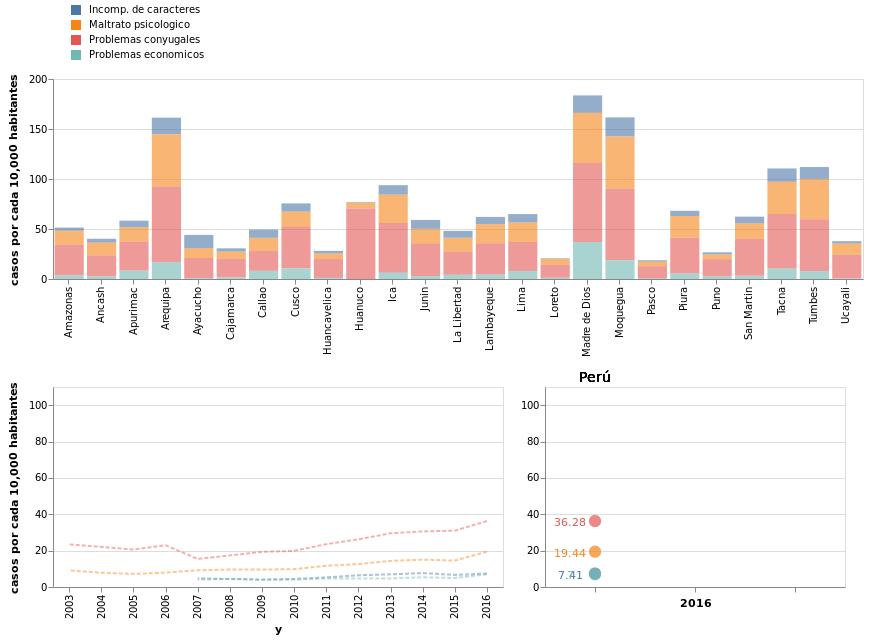

In [445]:
plots.tl_summary(df_v, values='value', time='y', bars='departamento', col='indicador', text=unidad,
                 slope_avg='Perú')

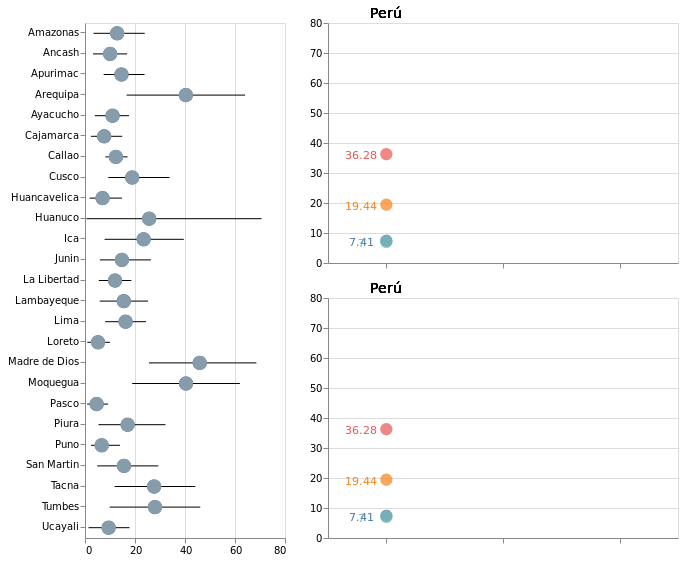

In [497]:
plots.slope_comparison(df_v.query('y == 2016'), values='value', bars='departamento', col='indicador', text=unidad,
                       slope_avg='Perú')

# Violence against women

Casos Registrados Por El Ministerio De La Mujer Y Poblaciones Vulnerables, De Violencia Familiar Y/O Sexual Contra La Mujer (cases per 1000 person):


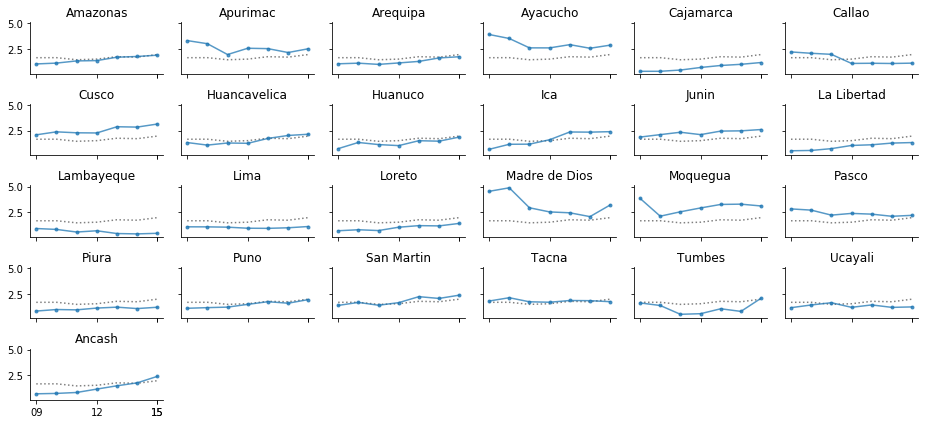

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015.


In [151]:
inei_series.plot_vars(df,
   ['casos_registrados_por_el_ministerio_de_la_mujer_y_poblaciones_vulnerables,_de_violencia_familiar_y/o_sexual_contra_la_mujer'],
    ratio_by=inei_series.FLDS_POPULATION,
    ratio_desc='cases per 1000 person', ratio_mult=1000)